In [1]:
from sklearn import datasets 
import numpy as np 
import pandas as pd
iris = datasets.load_iris() 
X = iris.data 
# Sepal and pedal negth and width 
y = iris.target 
IRIS = pd.DataFrame({'Sepal_Length':X[:,0], 'Sepal_Width':X[:,1], 'Petal_Length':X[:,2], 
                     'Petal_Width':X[:,3], 'Species':y})

In [2]:
IRIS

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
IRIS.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

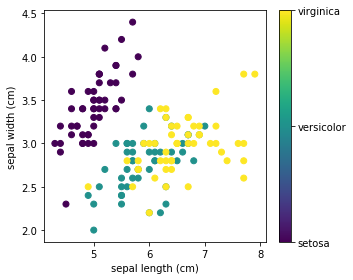

In [7]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

C:\Users\rothg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rothg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


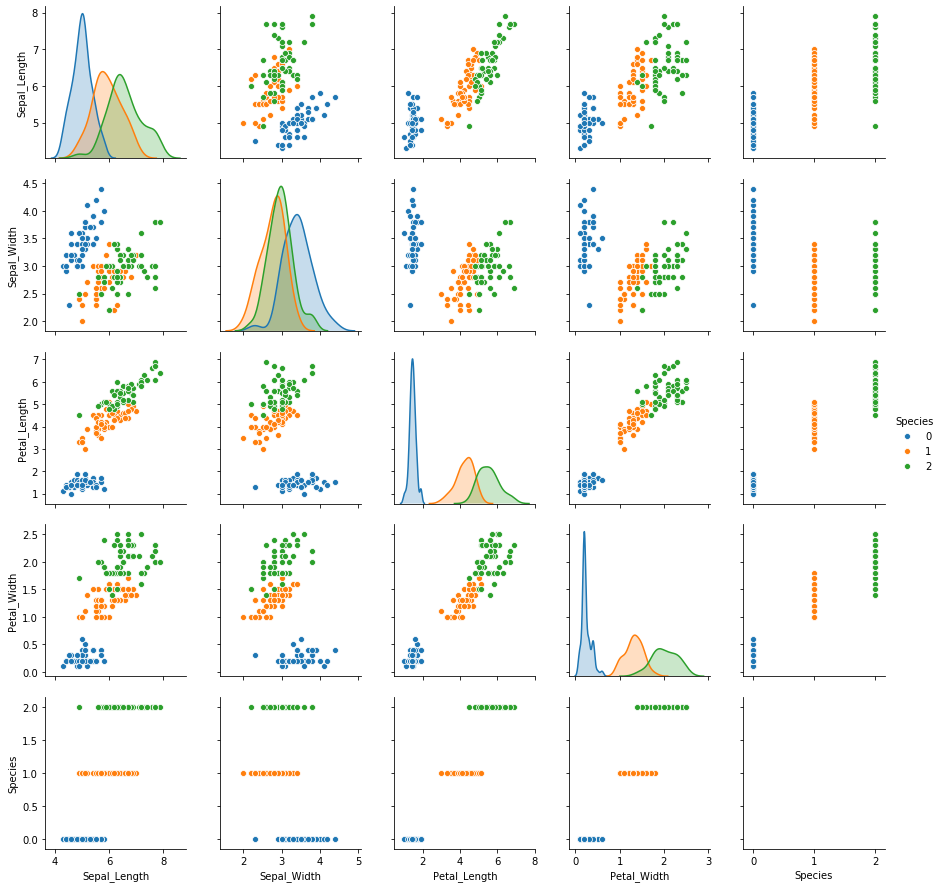

In [11]:
import seaborn as sns
sns.pairplot(IRIS,hue='Species')

In [9]:
#One way of improving accuracy is to change the prior probabilites from gnb=GaussianNB below
#by adding percents
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
gnb = GaussianNB(priors=[.13,.74,.13]) 
gnb = gnb.fit(X_train, y_train) 
y_predict = gnb.predict(X_test) 
accuracy_score(y_test, y_predict)*100
#For discrete features we use MultinomialNB()

97.77777777777777